In [1]:
import numpy as np
import pandas as pd

In [3]:
mydata=pd.read_csv('/content/Life Expectancy Data.csv')

In [4]:
mydata.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
# prompt: code for identifying the missing value in all column

import numpy as np
import pandas as pd
import seaborn as sns
mydata=pd.read_csv('/content/Life Expectancy Data.csv')
#mydata.head()
# Check for missing values in each column and calculate the percentage
missing_values = mydata.isnull().sum()
percentage_missing = (missing_values / len(mydata)) * 100
missing_data_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
missing_data_summary

,Missing Values,Percentage
Country,0,0.000000
Year,0,0.000000
Status,0,0.000000
Life expectancy,10,0.340368
Adult Mortality,10,0.340368
infant deaths,0,0.000000
Alcohol,194,6.603131
percentage expenditure,0,0.000000
Hepatitis B,553,18.822328
Measles,0,0.000000


In [9]:
# prompt: code for replacing missing value with the mean of the column and in categorial column fill with mode

# Identify numerical and categorical columns
numerical_cols = mydata.select_dtypes(include=np.number).columns
categorical_cols = mydata.select_dtypes(exclude=np.number).columns

# Fill missing numerical values with the mean of the column
for col in numerical_cols:
    if mydata[col].isnull().any():
        mean_val = mydata[col].mean()
        mydata[col].fillna(mean_val, inplace=True)

# Fill missing categorical values with the mode of the column
for col in categorical_cols:
    if mydata[col].isnull().any():
        mode_val = mydata[col].mode()[0]  # Get the first mode if multiple exist
        mydata[col].fillna(mode_val, inplace=True)

<ipython-input-9-bf03bde97cff>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mydata[col].fillna(mean_val, inplace=True)


In [10]:
# prompt: download the data in my system

from google.colab import files
mydata.to_csv('preprocessed_data.csv', index=False)
files.download('preprocessed_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
df=pd.read_csv('/content/preprocessed_data.csv')

In [12]:

# Check for missing values in each column and calculate the percentage
missing_values = mydata.isnull().sum()
percentage_missing = (missing_values / len(mydata)) * 100
missing_data_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
missing_data_summary

,Missing Values,Percentage
Country,0,0.0
Year,0,0.0
Status,0,0.0
Life expectancy,0,0.0
Adult Mortality,0,0.0
infant deaths,0,0.0
Alcohol,0,0.0
percentage expenditure,0,0.0
Hepatitis B,0,0.0
Measles,0,0.0


In [15]:
import pandas as pd
import scipy.stats as stats

# Clean column names to remove leading or trailing spaces
df.columns = df.columns.str.strip()

# Validate the presence of required columns
required_columns = ['Country', 'Life expectancy']
if all(col in df.columns for col in required_columns):

    # Filter countries with sufficient data (more than one non-NaN value for 'Life expectancy')
    valid_countries = [
        country for country in df['Country'].unique()
        if df.loc[df['Country'] == country, 'Life expectancy'].dropna().shape[0] > 1
    ]

    # Group 'Life expectancy' values by valid countries
    country_groups = [
        df.loc[df['Country'] == country, 'Life expectancy'].dropna()
        for country in valid_countries
    ]

    # Perform one-way ANOVA if there are at least two valid groups
    if len(country_groups) > 1:
        f_stat, p_value = stats.f_oneway(*country_groups)

        # Display ANOVA results
        print("ANOVA Test Results for 'Life Expectancy' Across Countries:")
        print(f"F-statistic: {f_stat:.2f}")
        print(f"P-value: {p_value:.5f}")

        # Interpret the results
        significance_level = 0.05
        if p_value < significance_level:
            print("Conclusion: Statistically significant difference in 'Life expectancy' across countries.")
        else:
            print("Conclusion: No statistically significant difference in 'Life expectancy' across countries.")
    else:
        print("Error: Insufficient valid groups to perform ANOVA.")
else:
    print("Error: Required columns 'Country' or 'Life expectancy' are missing from the dataset.")



ANOVA Test Results for 'Life Expectancy' Across Countries:
F-statistic: 187.71
P-value: 0.00000
Conclusion: Statistically significant difference in 'Life expectancy' across countries.


In [16]:
# prompt: anova using Status column to Life expectancy

import pandas as pd
import scipy.stats as stats

# Assuming 'df' is your DataFrame with 'Status' and 'Life expectancy' columns
# If not, replace 'df' with the correct DataFrame name and ensure the columns exist

# Check for missing values in the relevant columns
if 'Status' in df.columns and 'Life expectancy' in df.columns:
    if df['Status'].isnull().any() or df['Life expectancy'].isnull().any():
        print("Warning: Missing values found in 'Status' or 'Life expectancy'. Consider imputation or removal.")

    # Group data by 'Status'
    status_groups = [df.loc[df['Status'] == status, 'Life expectancy'].dropna() for status in df['Status'].unique()]

    # Perform ANOVA if there are at least two valid groups
    if len(status_groups) >= 2:
        f_statistic, p_value = stats.f_oneway(*status_groups)

        print("ANOVA Results:")
        print(f"F-statistic: {f_statistic}")
        print(f"P-value: {p_value}")

        alpha = 0.05
        if p_value < alpha:
            print("There is a statistically significant difference in life expectancy between different statuses.")
        else:
            print("There is no statistically significant difference in life expectancy between different statuses.")
    else:
        print("Not enough groups for ANOVA.")
else:
    print("Error: 'Status' or 'Life expectancy' columns not found in the DataFrame.")

ANOVA Results:
F-statistic: 888.3492783026539
P-value: 9.034938663795522e-171
There is a statistically significant difference in life expectancy between different statuses.


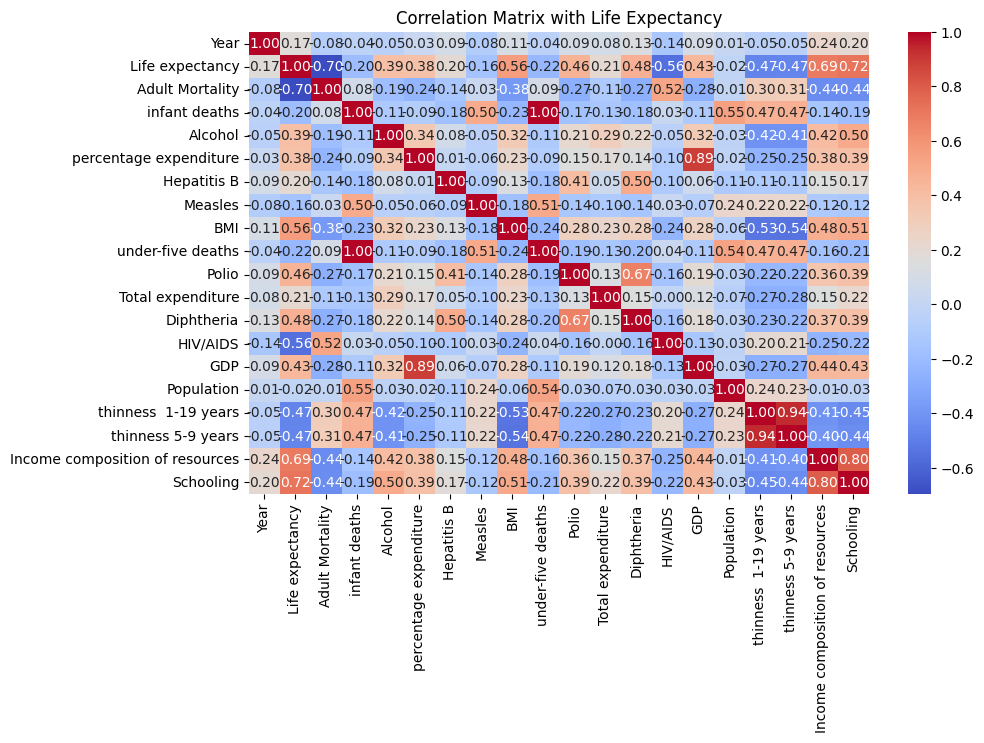


Correlation with Life Expectancy:
Year                               0.169623
Adult Mortality                   -0.696359
infant deaths                     -0.196535
Alcohol                            0.391598
percentage expenditure             0.381791
Hepatitis B                        0.203771
Measles                           -0.157574
BMI                                0.559255
under-five deaths                 -0.222503
Polio                              0.461574
Total expenditure                  0.207981
Diphtheria                         0.475418
HIV/AIDS                          -0.556457
GDP                                0.430493
Population                        -0.019638
thinness  1-19 years              -0.472162
thinness 5-9 years                -0.466629
Income composition of resources    0.692483
Schooling                          0.715066
Name: Life expectancy, dtype: float64


In [21]:
# prompt: code for print  correlation matrix with Life expectancy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Ensure only numeric columns are used for the correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Check if 'Life expectancy' exists in the numeric DataFrame
if 'Life expectancy' in correlation_matrix.columns:
    # Filter correlations for 'Life expectancy'
    life_expectancy_corr = correlation_matrix['Life expectancy'].drop('Life expectancy')

    # Create the heatmap
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix with Life Expectancy')
    plt.show()

    # Print the correlation values with 'Life expectancy'
    print("\nCorrelation with Life Expectancy:")
    print(life_expectancy_corr)
else:
    print("The column 'Life expectancy' is not in the dataset or is not numeric.")




Regression Equation:
Life Expectancy = 44.22 + 2.08 * Schooling

Model Evaluation:
Mean Squared Error (MSE): 39.37
R-squared (R2): 0.55


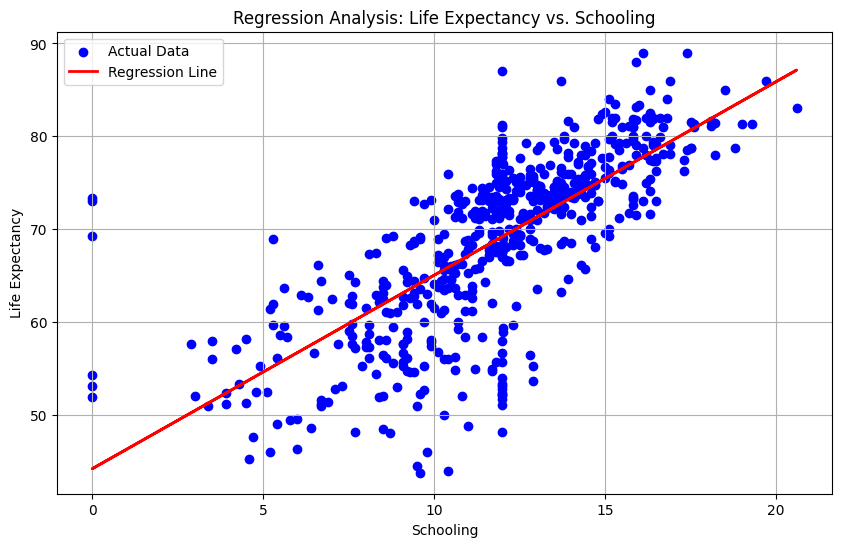

In [23]:
# prompt: simple linear regression for schooling and life expectancy

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Clean column names
df.columns = df.columns.str.strip()

# Define features and target variable
X = df[['Schooling']]  # Independent variable: Schooling
y = df['Life expectancy']  # Dependent variable: Life Expectancy

# Handle missing values by filling with the column mean
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Retrieve model parameters
intercept = linear_model.intercept_
coefficient = linear_model.coef_[0]

# Display the regression equation
print("\nRegression Equation:")
print(f"Life Expectancy = {intercept:.2f} + {coefficient:.2f} * Schooling")

# Predict Life Expectancy for the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line', linewidth=2)
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Regression Analysis: Life Expectancy vs. Schooling')
plt.legend()
plt.grid()
plt.show()


In [26]:
# prompt: code for multiple regression

# Define features (X) and target variable (y)
X = df[['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']]
y = df['Life expectancy']

# Handle missing values (if any) - You might need to adjust this based on your data
X = X.fillna(X.mean())  # Replace missing values with the mean
y = y.fillna(y.mean())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 15.373769135661172
R-squared: 0.8225460841766439
Coefficients: [-2.12134468e-02  9.68226210e-02  1.19014217e-01  1.17958745e-04
 -1.70597610e-02 -2.39609227e-05  3.94321132e-02 -7.18783999e-02
  2.79702857e-02  5.99337033e-02  4.03016053e-02 -4.61491716e-01
  3.70956348e-05 -1.03038280e-09 -9.89012066e-02  6.88948317e-03
  6.62646455e+00  6.49472006e-01]
Intercept: 55.20017410230132


In [27]:
# prompt: print multiple regression formula

# Print the multiple regression formula
print("Multiple Regression Formula:")
print("Life expectancy =", model.intercept_, end=" ")
for i in range(len(X.columns)):
    print(f"+ ({model.coef_[i]:.2f})*{X.columns[i]}", end=" ")

Multiple Regression Formula:
Life expectancy = 55.20017410230132 + (-0.02)*Adult Mortality + (0.10)*infant deaths + (0.12)*Alcohol + (0.00)*percentage expenditure + (-0.02)*Hepatitis B + (-0.00)*Measles + (0.04)*BMI + (-0.07)*under-five deaths + (0.03)*Polio + (0.06)*Total expenditure + (0.04)*Diphtheria + (-0.46)*HIV/AIDS + (0.00)*GDP + (-0.00)*Population + (-0.10)*thinness  1-19 years + (0.01)*thinness 5-9 years + (6.63)*Income composition of resources + (0.65)*Schooling 